In [4]:
from IPython.display import Audio
import os
from audio2numpy import open_audio
os.chdir(r"D:\eece 2021\4th year\first term\dsp\New folder")
print(os.getcwd())
import matplotlib.pyplot as plt
import librosa
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler as StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools


d:\eece 2021\4th year\first term\dsp\New folder


In [5]:
record = 'atwa_0.wav'
audioIn, fs = open_audio(record)
print(audioIn,fs)

[-1.9226074e-03 -1.7700195e-03 -1.8310547e-03 ...  0.0000000e+00
  9.1552734e-05  2.7465820e-04] 48000


In [6]:
Audio(data = audioIn,rate = fs,autoplay=True)

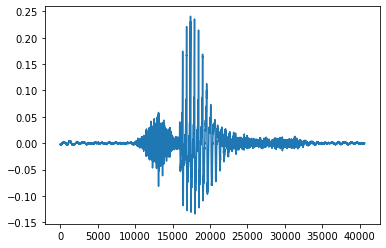

In [7]:
plt.plot(audioIn)
plt.show()
windowLength = round(0.03*fs)
overlapLength = round(0.025*fs)

In [8]:
directory = "data"
directories = os.listdir(directory)
print(directories)
labels = directories

['atwa', 'Emad', 'Gendy', 'Hadeer', 'Hady', 'kareem', 'Karimbro', 'Metwally', 'Muhammed', 'sawy']


In [9]:
data = {}
data_full = []
for i in range(len(directories)):
    data[directories[i]] = os.listdir(directory+'\\'+directories[i])
    #dire = os.listdir(directory+'\\'+directories[i])
    for value in data[directories[i]]:
        data_full.append(directories[i]+'_'+value)
#print(data)
print(data_full)
"""
DATA_DIR = 'newData/newData/' 
files = glob.glob(DATA_DIR + "*.wav")"""
X_train, X_test = train_test_split(data_full, test_size=0.2)
print('# Training examples: {}'.format(len(X_train)))
print('# Validation examples: {}'.format(len(X_test)))

['atwa_0.wav', 'atwa_1.wav', 'atwa_2.wav', 'atwa_3.wav', 'atwa_4.wav', 'atwa_5.wav', 'atwa_6.wav', 'atwa_7.wav', 'atwa_8.wav', 'atwa_9.wav', 'Emad_0.wav', 'Emad_1.wav', 'Emad_2.wav', 'Emad_3.wav', 'Emad_4.wav', 'Emad_5.wav', 'Emad_6.wav', 'Emad_7.wav', 'Emad_8.wav', 'Emad_9.wav', 'Gendy_10_3.wav', 'Gendy_1_3.wav', 'Gendy_2_3.wav', 'Gendy_3_3.wav', 'Gendy_4_3.wav', 'Gendy_5_3.wav', 'Gendy_6_3.wav', 'Gendy_7_3.wav', 'Gendy_8_3.wav', 'Gendy_9_3.wav', 'Hadeer_0_4.wav', 'Hadeer_1_4.wav', 'Hadeer_2_4.wav', 'Hadeer_3_4.wav', 'Hadeer_4_4.wav', 'Hadeer_5_4.wav', 'Hadeer_6_4.wav', 'Hadeer_7_4.wav', 'Hadeer_8_4.wav', 'Hadeer_9_4.wav', 'Hady_0_5.wav', 'Hady_1_5.wav', 'Hady_2_5.wav', 'Hady_3_5.wav', 'Hady_4_5.wav', 'Hady_5_5.wav', 'Hady_6_5.wav', 'Hady_7_5.wav', 'Hady_8_5.wav', 'Hady_9_5.wav', 'kareem_0_6.wav', 'kareem_1_6.wav', 'kareem_2_6.wav', 'kareem_3_6.wav', 'kareem_4_6.wav', 'kareem_5_6.wav', 'kareem_6_6.wav', 'kareem_7_6.wav', 'kareem_8_6.wav', 'kareem_9_6.wav', 'Karimbro_0_7.wav', 'Karimbr

In [10]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(list(set(labels)))

def one_hot_encode(x): return label_binarizer.transform(x)

In [11]:
labels_full = []
labels_full_test = []
for i in range(len(X_train)):
    new_label = X_train[i].split('/')[-1].split('_')[0]
    labels_full.append(new_label)
    X_train[i] = X_train[i].split(new_label+'_')[-1]
for i in range(len(X_test)):
    new_label = X_test[i].split('/')[-1].split('_')[0]
    labels_full_test.append(new_label)
    X_test[i] = X_test[i].split(new_label+'_')[-1]
print(labels_full_test)
print(labels_full)

['Karimbro', 'sawy', 'Emad', 'atwa', 'Hady', 'Gendy', 'atwa', 'Metwally', 'Muhammed', 'Muhammed', 'kareem', 'Hady', 'Hady', 'Hady', 'Gendy', 'Gendy', 'atwa', 'sawy', 'Hadeer', 'atwa']
['kareem', 'sawy', 'Emad', 'Muhammed', 'Muhammed', 'Metwally', 'sawy', 'Gendy', 'Metwally', 'Emad', 'Emad', 'Karimbro', 'Hady', 'Gendy', 'Hady', 'Hadeer', 'Metwally', 'Muhammed', 'kareem', 'sawy', 'Hady', 'Muhammed', 'atwa', 'Gendy', 'Hady', 'Muhammed', 'Karimbro', 'Muhammed', 'kareem', 'Metwally', 'Hady', 'Karimbro', 'Hadeer', 'kareem', 'sawy', 'Gendy', 'Emad', 'Muhammed', 'Karimbro', 'atwa', 'Hady', 'Metwally', 'kareem', 'Emad', 'kareem', 'sawy', 'atwa', 'atwa', 'Gendy', 'kareem', 'Karimbro', 'Karimbro', 'Hadeer', 'Emad', 'kareem', 'Hadeer', 'kareem', 'sawy', 'atwa', 'sawy', 'Hadeer', 'sawy', 'Muhammed', 'Emad', 'Gendy', 'Hadeer', 'Hadeer', 'Emad', 'Gendy', 'Karimbro', 'Karimbro', 'atwa', 'Emad', 'Metwally', 'Metwally', 'Karimbro', 'Metwally', 'Hadeer', 'Hadeer', 'Metwally']


In [12]:
print(os.getcwd())
wave, sr = librosa.load('data\\'+labels_full[9]+'\\'+X_train[9],mono=True)
mfcc =  librosa.feature.mfcc(wave, sr)
print(mfcc.shape[1])

d:\eece 2021\4th year\first term\dsp\New folder
22


In [13]:
mfcc = []
mfcc_test = []
labels_full_encoded = []
max_len = 0
for i in range(len(labels_full)):
    wave, sr = librosa.load('data\\'+labels_full[i]+'\\'+X_train[i],mono=True)
    #audioIn, fs = open_audio('data\\'+labels_full[0]+'\\'+X_train[0]))
    mfcc.append(librosa.feature.mfcc(wave, sr))
    if(mfcc[i].shape[1] > max_len):
        max_len = mfcc[i].shape[1]
    labels_full_encoded.append(one_hot_encode([labels_full[i]])) 

for i in range(len(labels_full_test)):
    wave, sr = librosa.load('data\\'+labels_full_test[i]+'\\'+X_test[i],mono=True)
    #audioIn, fs = open_audio('data\\'+labels_full[0]+'\\'+X_train[0]))
    mfcc_test.append(librosa.feature.mfcc(wave, sr))
    if(mfcc_test[i].shape[1]>max_len):
        max_len = mfcc_test[i].shape[1]
    #labels_full_encoded.append(one_hot_encode([labels_full[i]])) 

In [14]:
for i in range(len(mfcc)):
    mfcc[i] = np.pad(mfcc[i], ((0,0), (0, max_len-mfcc[i].shape[1])), mode='constant', constant_values=0) 
for i in range(len(mfcc_test)):
    mfcc_test[i] = np.pad(mfcc_test[i], ((0,0), (0, max_len-mfcc_test[i].shape[1])), mode='constant', constant_values=0) 

In [15]:
mfcc[9].shape

(20, 63)

In [16]:
mfcc = np.array(mfcc)
mfcc = mfcc.reshape(80,-1)
print(mfcc.shape)
scaler = StandardScaler()
scaler.fit(mfcc)
mfcc_test = np.array(mfcc_test)
mfcc_test = mfcc_test.reshape(20,-1)
print(mfcc_test.shape)
scaler = StandardScaler()
scaler.fit(mfcc_test)
all_data = np.concatenate((mfcc,mfcc_test))
all_labels = itertools.chain(labels_full,labels_full_test)
all_labels = list(all_labels)


(80, 1260)
(20, 1260)


In [17]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(all_data,all_labels)
#eigh.fit(mfcc_test,labels_full_test)

KNeighborsClassifier()

In [18]:
y_predict = neigh.predict(all_data)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, all_labels)}')

Confusion Matrix: 
[[ 9  2  1  0  0  0  0  1  2  0]
 [ 0  8  1  3  1  1  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  1  0  0]
 [ 0  0  0  0  6  0  0  0  3  0]
 [ 0  0  0  1  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  1]
 [ 1  0  1  0  2  0  0  0  4  0]
 [ 0  0  0  0  1  0  0  2  1  9]]


In [19]:
record = 'metwally_8_8.wav'
wave, sr = librosa.load(record,mono=True)
Audio(data = wave,rate = sr,autoplay=True)

In [20]:

mfcc =  librosa.feature.mfcc(wave, sr)
mfcc = np.pad(mfcc, ((0,0), (0, max_len-mfcc.shape[1])), mode='constant', constant_values=0) 
mfcc = np.array(mfcc)
mfcc = mfcc.reshape(1,-1)
scaler = StandardScaler()
scaler.fit(mfcc)
y_predict = neigh.predict(mfcc)

In [21]:
y_predict

array(['Metwally'], dtype='<U8')